<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0505_%ED%9A%8C%EA%B7%80_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀
회귀 분석: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법으로, 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭함.
- 머신러닝 관점에서, 독립변수는 피처이며 종속변수는 결정값. 머신러닝 회귀 예측은 주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.

지도학습

1. 분류
- 예측값이 카테고리와 같은 이산형 클래스
2. 회귀
- 예측값이 연속형 숫자 값
- 가장 많이 사용되는 선형 회귀는 오류의 제곱 값을 최소화하는 직선형 회귀선을 최적화하는 방식. 규제 방법에 따라 일반 선형 회귀, 릿지, 라쏘, 엘라스틱넷, 로지스틱 회귀로 나뉘어짐
- RSS를 최소화하는 가중치, 회귀 계수를 학습을 통해 찾는 것이 머신러닝 회귀의 핵심 사항
- 회귀에서 RSS는 비용, 회귀 계수로 구성되는 RSS를 비용 함수(또는 손실 함수, loss function)라고 함. 회귀 알고리즘이 데이터를 계속 학습하면서 비용 함수가 반환하는 오류값을 지속적으로 감소시키고, 최종적으로 가장 작은 최소 오류 값을 구하는 것.

경사 하강법(Gradient Descent): 고차원 방정식에서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식. 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터로 값을 보정해 나감. 이때, 각 변수에 대해 편미분하여 RSS를 최소화하는 w 값을 각각 얻음. 편미분 값이 너무 클 수 있기 때문에 보정계수인 학습률을 곱해 줌.

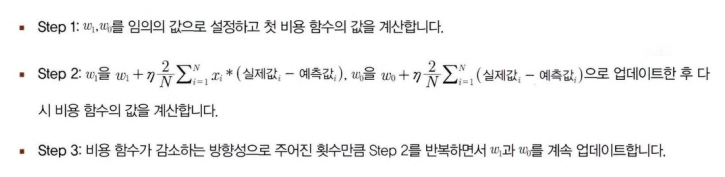



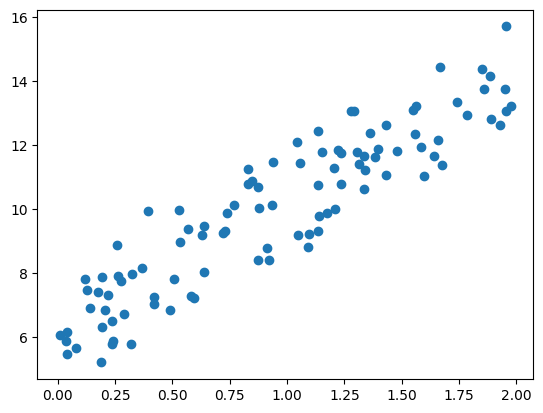

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [4]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

In [5]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  # w1 과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [8]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1 과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1 을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [11]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost：{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost：0.9935


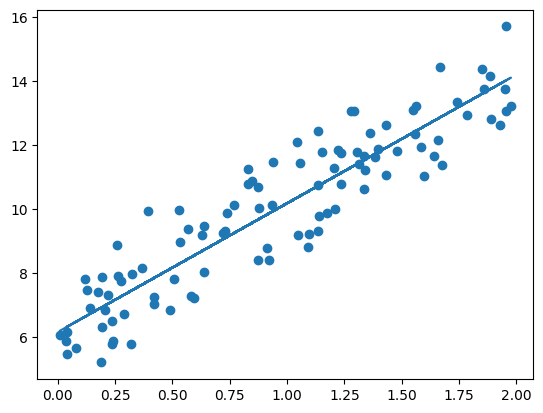

In [14]:
plt.scatter(X,y)
plt.plot(X, y_pred)

경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림. 그래서 실전에서는 대부분 확률적 경사 하강법을 이용.

확률적 경사 하강법
- 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장함. 대용량의 데이터의 경우 미니 배치확률적 경사 하강법이나 이 확률적 경사 하강법으로 최적 비용함수를 도출함

In [15]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [18]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1 [0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost：{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162
Stochastic Gradient Descent Total Cost：0.9935


# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [50]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import fetch_openml

# boston 데이터 세트 로드
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['RAD'] = bostonDF['RAD'].astype(float)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target.astype(float)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


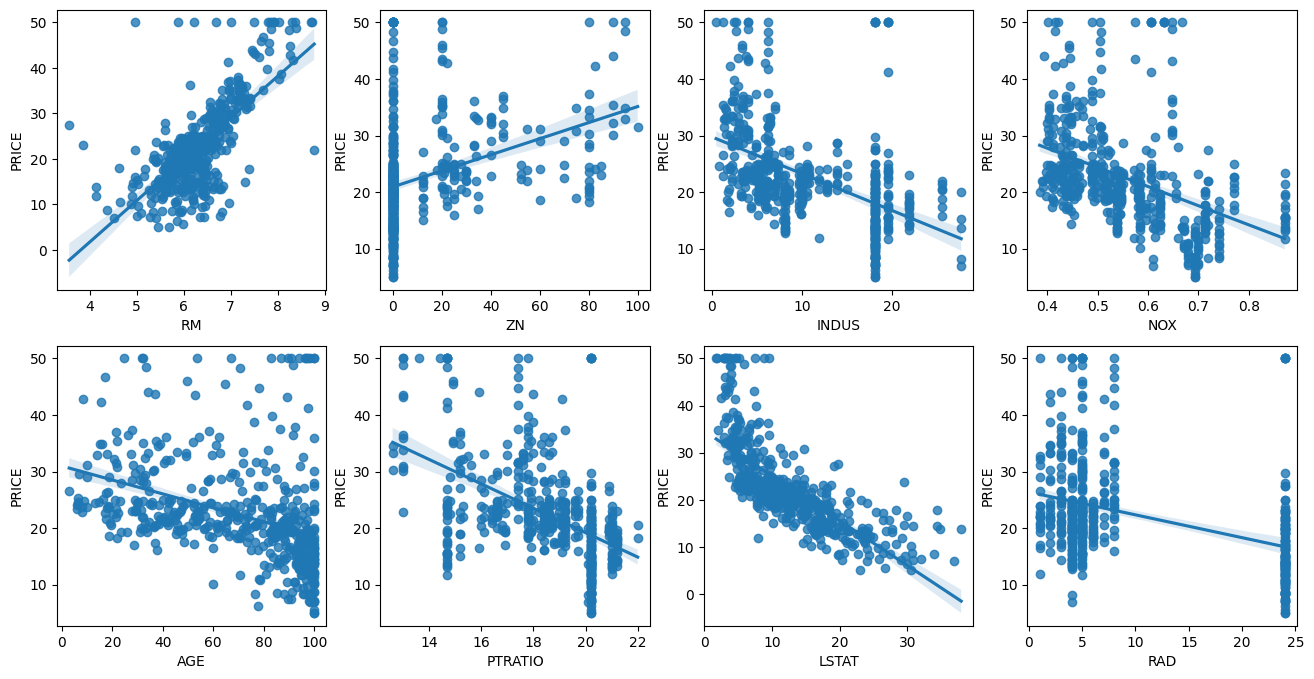

In [52]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = i // 4
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_data = X_data.apply(pd.to_numeric, errors='coerce')
X_data = X_data.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                    random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE ： {1:.3F}'.format(mse,  rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE ： 4.159
Variance score: 0.757


In [54]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [55]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending = False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


5개의 폴드 세트에서 교차 검증으로 MSE와 RMSE 측정

In [56]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_data = X_data.apply(pd.to_numeric, errors='coerce')
X_data = X_data.fillna(0)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE: 5.829


# 다항 회귀와 과(대)적합/과소적합 이해

앞선 예제들은 독립변수와 종속변수의 관계가 일차방정식 형태로 표현된 회귀였음. 더 나아가 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라 함.

주의: 다항회귀도 선형 회귀
- 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이며, 독립변수의 선형/비선형 여부와는 무관함.

사이킷런 PolynomialFeatures클래스로 피처를 다항식 피처로 변환한 뒤 모델 구현

In [57]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


[x1, x2]를 2차 다항 계수 [1, x1, x2, x1^2, x1*x2, x2^2]처럼 변경하는 것. [0, 1]이 그래서 [1, 0, 1, 0, 0, 1]이 됨. 이렇게 변환된 polynomial 피처에 선형 회귀를 적용해 다항 회귀를 구현함.

In [58]:
#3차 다항회귀의 결정 함수식
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [59]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있음. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능함. 하지만 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 예측 정확도가 하락함. 즉, 차수가 높아질수록 과적합 문제가 크게 발생.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894입니다.


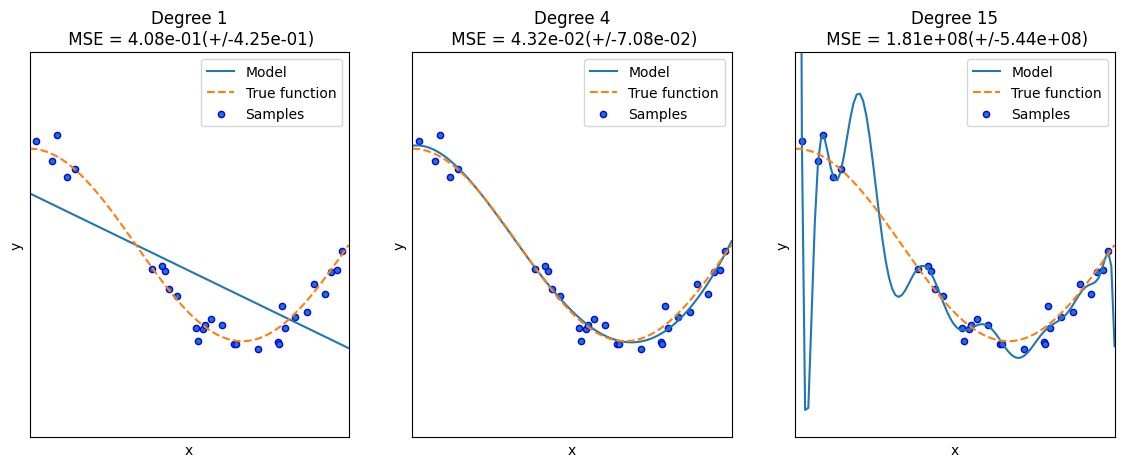

In [62]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression=LinearRegression()
  pipeline = Pipeline([('polynomial_features',polynomial_features),
                       ('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1}입니다.'.format(degrees[i],-1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label='Model')
  # 실제 값 곡선
  plt.plot(X_test,true_fun(X_test),'--',label='True function')
  plt.scatter(X,y,edgecolors='b',s=20,label='Samples')

  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
  plt.title('Degree {}\n MSE = {:.2e}(+/-{:.2e})'.format(degrees[i],-scores.mean(),scores.std()))

plt.show()

# 편향-분산 트레이드오프

위의 Degree1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 존재함. 이런 모델을 고편향성을 가졌다고 표현.
반면 15와 같은 모델은 학습 데이터 개별의 트겅을 반영하면서 매우 복잡한 모델이 되었고, 지나치게 높은 변동성을 가지게 되었음. 이러한 모델은 고분산성을 가졌다고 표현함.

- 저편향/저분산: 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 성능이 우수함.

그러나 일반적으로 편향과 분산은 서로 반대 방향으로 가는 트레이드오프 관계. 편향이 너무 높으면 전체 오류가 높고, 분산을 지속적으로 높여도 전체 오류 값이 증가함. 어느 정도 편향과 분산의 균형을 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축해야 함.